In [3]:
import os
import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import misc
import pandas as pd
import cv2 as cv
import fnmatch

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

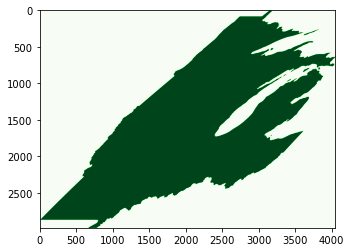

In [2]:
# import midWest maskID file #
midWest_maskNAID = cv.imread (r"Y:/mwpmlregion.tif",2)  # NA: North American
plt.imshow (midWest_maskNAID,cmap = plt.cm.Greens)
midWest_maskNAID

In [8]:
def get_filename(path=r'X:/IGBP/'):
    filenames=[]
    name_pattern = '*.tif'
#     name_pattern = '*.tif'
    for filename in os.listdir(path):
        if fnmatch.fnmatch(filename, name_pattern):
            filenames.append(path+filename)

    return filenames
filenames=get_filename(path=r'X:/IGBP/')
# print (filenames)

In [10]:
def get_filenameET(path=r'Y:/ET_PML/ET/'):
    filenamesET=[]
    name_pattern = '*.tif'
#     name_pattern = '*.tif'
    for filenameET in os.listdir(path):
        if fnmatch.fnmatch(filenameET, name_pattern):
            filenamesET.append(path+filenameET)

    return filenamesET
filenamesET=get_filenameET(path=r'Y:/ET_PML/ET/')
# print (filenamesET)

In [77]:
IGBPcropland=[]
for filename in filenames:
    year = filename[13:17]
#     List Comprehension
#     Lambda Functions
#     fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
#     newlist = [x for x in fruits if "a" in x]
    
    for filenameET in filenamesET:
#             print(filenameET)
        #for filename,filenameET in zip(filenames,filenamesET):
            if filenameET[13:17]==year:
                IGBPcl = gdal.Open(filename)
                IGBPcl = IGBPcl.ReadAsArray()
                IGBPclmw = IGBPcl*midWest_maskNAID
                pmlET= gdal.Open(filenameET)
                pmlET = pmlET.ReadAsArray()
                pmlETclmw=pmlET[(np.where(IGBPclmw==12)[0]),(np.where(IGBPclmw==12)[1])].mean()
                IGBPcropland.append(pmlETclmw)
                
IGBPcropland

[6.464065,
 9.664386,
 35.83179,
 59.959587,
 74.099106,
 101.964874,
 115.86704,
 101.16211,
 61.87219,
 35.94787,
 11.630837,
 4.4630294,
 5.6756644,
 8.872872,
 38.79185,
 60.90187,
 81.866776,
 102.27107,
 108.578224,
 92.743416,
 68.35584,
 26.5478,
 9.867365,
 4.076383,
 3.7320547,
 12.220593,
 36.577526,
 64.260864,
 79.41096,
 114.59008,
 127.95582,
 102.24158,
 70.121895,
 33.84858,
 13.684476,
 1.9593774,
 5.462989,
 16.051012,
 30.494675,
 68.787315,
 81.15519,
 112.48637,
 128.54836,
 91.42873,
 58.28365,
 29.267984,
 13.74921,
 5.4228806,
 3.5218782,
 7.0417285,
 38.434105,
 63.30807,
 87.66507,
 113.21495,
 131.34848,
 107.175705,
 69.601494,
 32.214565,
 14.725814,
 2.2444797,
 3.5276005,
 7.617466,
 32.25412,
 62.11367,
 80.6275,
 113.954445,
 128.8784,
 107.64495,
 62.34489,
 25.477785,
 6.24614,
 2.7330525,
 2.1844835,
 12.874757,
 38.603096,
 59.576473,
 81.89449,
 110.25616,
 115.74792,
 99.82066,
 59.77055,
 23.214754,
 10.112677,
 1.8770347,
 0.7871185,
 5.2660413

In [78]:
def myfunc(n):
  return lambda a : a * n

mydoubler = myfunc(2)

print(mydoubler(11))

22


In [79]:
def myfunc(n):
  return lambda a : a * n

mytripler = myfunc(3)

print(mytripler(11))

33


In [80]:
def myfunc(n):
  return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

22
33


In [81]:
List = [[2,3,4],[1, 4, 16, 64],[3, 6, 9, 12]]
 
# Sort each sublist
sortList = lambda x: (sorted(i) for i in x)
 
# Get the second largest element
secondLargest = lambda x, f : [y[len(y)-2] for y in f(x)]
res = secondLargest(List, sortList)
 
print(res)

[3, 16, 9]


#### Using lambda() Function with filter()

In [82]:
# Python code to illustrate
# filter() with lambda()
li = [5, 7, 22, 97, 54, 62, 77, 23, 73, 61]
 
final_list = list(filter(lambda x: (x%2 != 0) , li))
print(final_list)

[5, 7, 97, 77, 23, 73, 61]


In [83]:

# Python 3 code to people above 18 yrs
ages = [13, 90, 17, 59, 21, 60, 5]
 
adults = list(filter(lambda age: age>18, ages))
 
print(adults)

[90, 59, 21, 60]


#### Using lambda() Function with map()

In [84]:

# Python code to illustrate
# map() with lambda()
# to get double of a list.
li = [5, 7, 22, 97, 54, 62, 77, 23, 73, 61]
 
final_list = list(map(lambda x: x*2, li))
print(final_list)

[10, 14, 44, 194, 108, 124, 154, 46, 146, 122]


In [85]:

# Python program to demonstrate
# use of lambda() function
# with map() function
animals = ['dog', 'cat', 'parrot', 'rabbit']
 
# here we intend to change all animal names
# to upper case and return the same
uppered_animals = list(map(lambda animal: str.upper(animal), animals))
 
print(uppered_animals)

['DOG', 'CAT', 'PARROT', 'RABBIT']


#### Using lambda() Function with reduce()

In [86]:

# Python code to illustrate
# reduce() with lambda()
# to get sum of a list
 
from functools import reduce
li = [5, 8, 10, 20, 50, 100]
sum = reduce((lambda x, y: x + y), li)
print (sum)

193


In [87]:

# python code to demonstrate working of reduce()
# with a lambda function
 
# importing functools for reduce()
import functools
 
# initializing list
lis = [ 1 , 3, 5, 6, 2, ]
 
# using reduce to compute maximum element from list
print ("The maximum element of the list is : ",end="")
print (functools.reduce(lambda a,b : a if a > b else b,lis))

The maximum element of the list is : 6
